In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('Shopping_Behaviour_Dataset.csv')
df

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
df = df.drop(df.columns[[0]],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [8]:
def categorize_age(age):
    if age < 18:
        return 'Teen'
    elif 18 <= age < 30:
        return 'Adult'
    elif 20 <= age < 60:
        return 'Mid'
    else:
        return 'Senior'

In [9]:
df['age_group'] = df['age'].apply(categorize_age)

In [10]:
df[['age','age_group']].head()

,age,age_group
0,55,Mid
1,19,Adult
2,50,Mid
3,21,Adult
4,45,Mid


In [11]:
(df['discount_applied'] == df['promo_code_used']).all()

True

In [12]:
df = df.drop('promo_code_used', axis=1)

In [13]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'color', 'season', 'review_rating',
       'subscription_status', 'shipping_type', 'discount_applied',
       'previous_purchases', 'payment_method', 'frequency_of_purchases',
       'age_group'],
      dtype='object')

###

In [15]:
total_revenue = df['purchase_amount_(usd)'].sum()
print("Total Revenue: $", total_revenue)

Total Revenue: $ 233081


In [16]:
df['purchase_amount_(usd)'].mean()

59.76435897435898

Text(0.5, 1.0, 'Total Sales by Category')

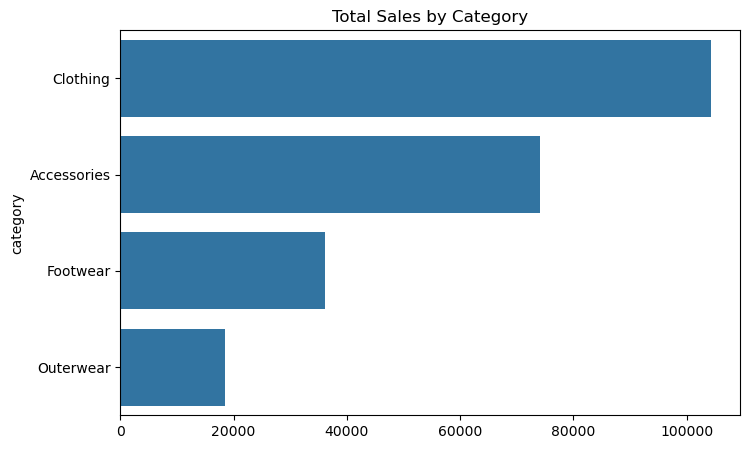

In [17]:
category_sales = df.groupby('category')['purchase_amount_(usd)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Total Sales by Category")

Text(0, 0.5, '')

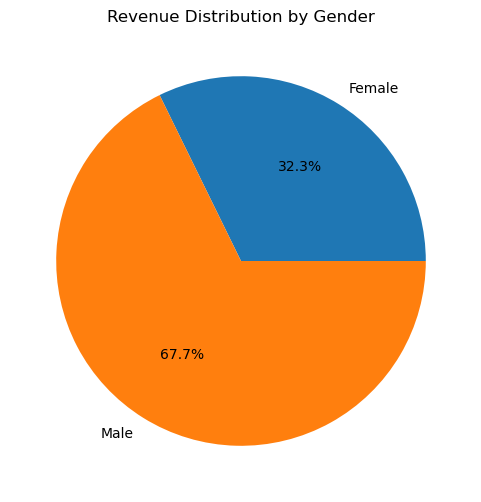

In [18]:
gender_sales = df.groupby('gender')['purchase_amount_(usd)'].sum()

gender_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Revenue Distribution by Gender")
plt.ylabel("")

Text(0.5, 1.0, 'Purchase Amount by Age Group')

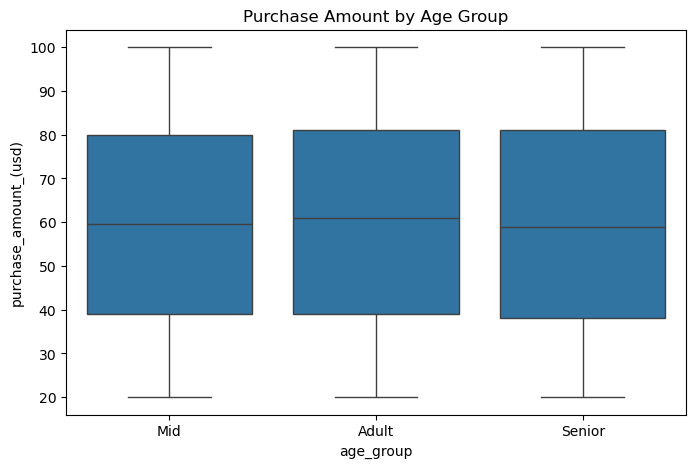

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='purchase_amount_(usd)', data=df)
plt.title("Purchase Amount by Age Group")

Text(0.5, 1.0, 'Sales by Season')

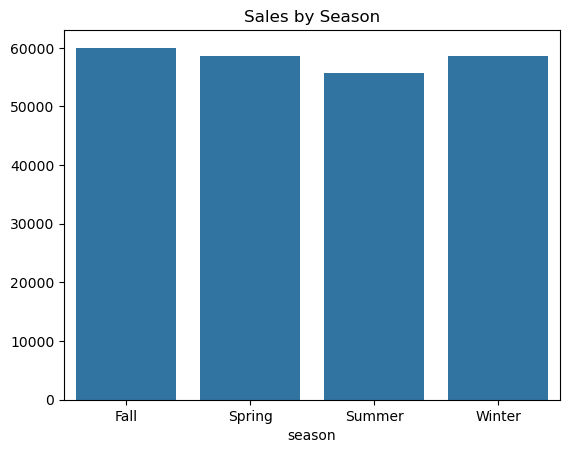

In [20]:
season_sales = df.groupby('season')['purchase_amount_(usd)'].sum()

sns.barplot(x=season_sales.index, y=season_sales.values)
plt.title("Sales by Season")

Text(0.5, 1.0, 'Discount vs Purchase Amount')

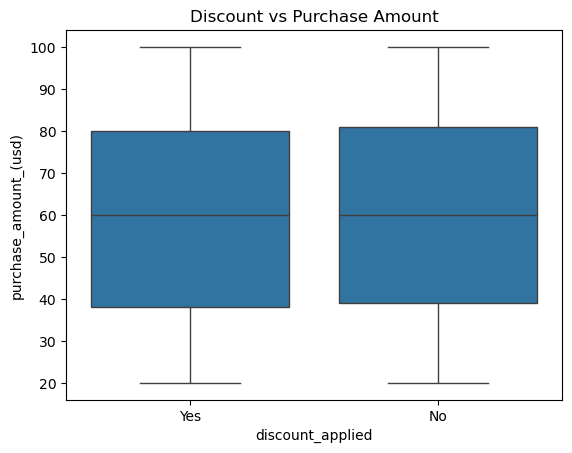

In [21]:
sns.boxplot(x='discount_applied', y='purchase_amount_(usd)', data=df)
plt.title("Discount vs Purchase Amount")

In [22]:
subscription_sales = df.groupby('subscription_status')['purchase_amount_(usd)'].mean()
subscription_sales

subscription_status
No     59.865121
Yes    59.491928
Name: purchase_amount_(usd), dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

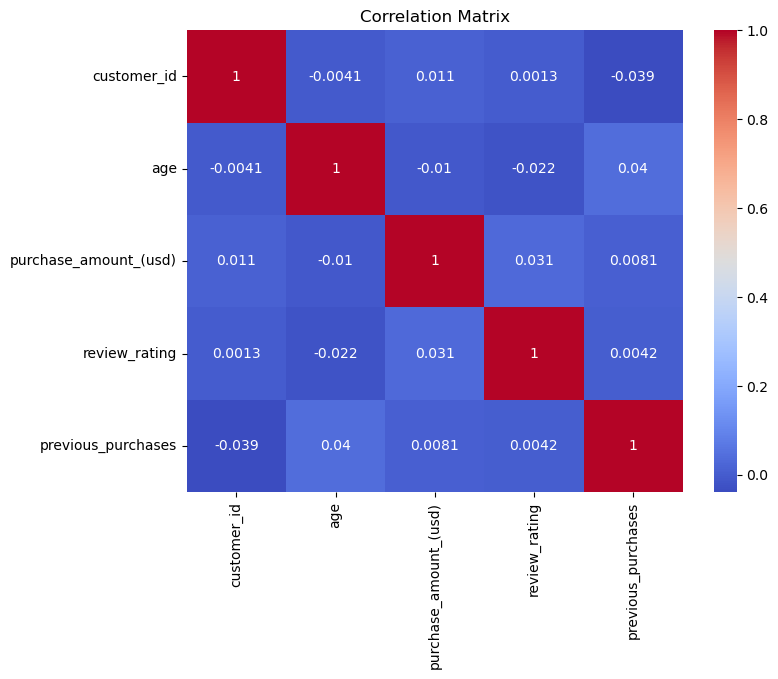

In [23]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

.

.

In [26]:
top_customers = df.groupby('customer_id')['purchase_amount_(usd)'].sum().sort_values(ascending=False).head(10)
top_customers

customer_id
2843    100
96      100
582     100
1422    100
3838    100
862     100
2215    100
1592    100
1457    100
244     100
Name: purchase_amount_(usd), dtype: int64

Text(0.5, 1.0, 'Payment Method Distribution')

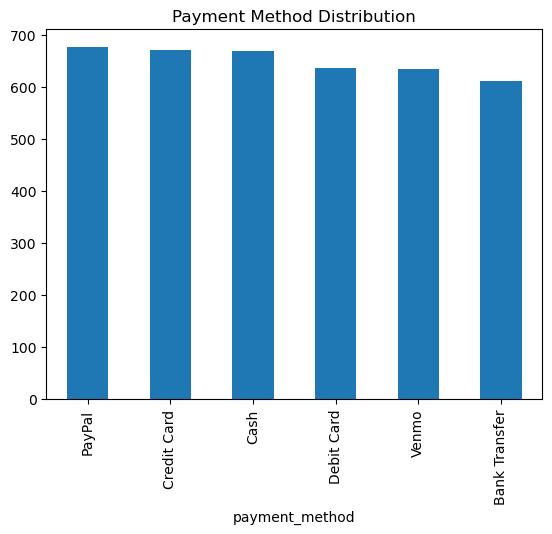

In [27]:
df['payment_method'].value_counts().plot(kind='bar')
plt.title("Payment Method Distribution")

In [28]:
df.groupby('shipping_type')['purchase_amount_(usd)'].mean().sort_values(ascending=False)

shipping_type
2-Day Shipping    60.733652
Express           60.475232
Free Shipping     60.410370
Store Pickup      59.893846
Next Day Air      58.631173
Standard          58.460245
Name: purchase_amount_(usd), dtype: float64

.

.

In [31]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [32]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = "postgres"
host = "localhost"
port = "5432"
database = "customer_behaviour"

password = quote_plus("Lol@33157966")
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "customer"
df.to_sql(table_name, engine, if_exists="replace", index= "false")
print(f"Data loaded in the table {table_name}")

Data loaded in the table customer
